##                                     PRINCIPAL COMPONENT ANANLYSIS

####### https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

#### Importing the dataset

In [15]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#load dataset into pandas dataframe
df = pd.read_csv(url,names=['Sepal length','Sepal width','Petal length','Petal width','target'])

df.head()

,Sepal length,Sepal width,Petal length,Petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Standardize the data
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms

In [41]:
from sklearn.preprocessing import StandardScaler

features = ['Sepal length','Sepal width','Petal length','Petal width']

# separating out the features
x = df.loc[:,features].values

# separating out the target
y = df.loc[:,['target']].values

# standardizing the features
x = StandardScaler().fit_transform(x)
xDf= pd.DataFrame(data=x,columns=[features])
xDf.head()

,Sepal length,Sepal width,Petal length,Petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### PCA projection to 2D

The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
# principal_components[0:5,:]
principalDf = pd.DataFrame(data=principal_components,columns=['Principal component 1','Principal component 2'])
principalDf.head()

,Principal component 1,Principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [44]:
finalDf = pd.concat([principalDf,df['target']],axis=1)
finalDf.head()

,Principal component 1,Principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [67]:
finalDf.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Visualize 2D projection
This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other

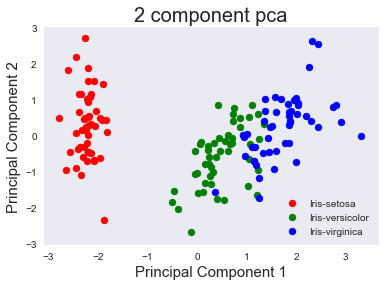

In [68]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1',fontsize = 15) 
ax.set_ylabel('Principal Component 2',fontsize = 15) 
ax.set_title('2 component pca',fontsize = 20)

targets=['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['r','g','b']

for target,color in zip(targets,colors):
    indicestokeep = finalDf['target'] ==target
    ax.scatter(finalDf.loc[indicestokeep,'Principal component 1']
              ,finalDf.loc[indicestokeep,'Principal component 2']
              ,c = color
              ,s = 50)
ax.legend(targets)
ax.grid()

### Explained variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [70]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

### PCA to speed up machine learning algorithms

In [72]:
# download and load the data

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [77]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [78]:
# split data into training and testing

from sklearn.model_selection import train_test_split
train_img,test_img,train_lbl,test_lbl =train_test_split(mnist.data,mnist.target,test_size=1/7.0,random_state=0)

In [79]:
# Standardize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit on training set only
scaler.fit(train_img)


# Apply transform to both training set and test set
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
# Import and apply PCA